In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

from utils.pickle import load_pickles

 #### Load pre-processed data

In [24]:
(
    train_x,
    valid_x,
    test_x,
    train_y,
    valid_y,
    test_y
) = load_pickles()


 #### Vectorize training data into features

In [25]:
word_vectorizer = TfidfVectorizer(lowercase=False,ngram_range=(1,3),max_features=20000)
word_vectorizer = word_vectorizer.fit(train_x)
train_features = word_vectorizer.transform(train_x)
validation_features = word_vectorizer.transform(valid_x)


 ### Fitting and predicting individual class labels
 #### Train and calculate AUC using decision tree classifiers for all class labels and varying max depths

In [26]:
classes = 6
max_depths = [10, 20, 40, 80, 160, 320]
train_mean_aucs, val_mean_aucs = [], []

for max_depth in max_depths:
    val_aucs = []
    train_aucs = []
    for i in range(classes):
        classifier = DecisionTreeClassifier(max_leaf_nodes=80, max_depth=max_depth)
        classifier = classifier.fit(train_features, train_y[:, i])
        
        valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
        val_aucs.append(auc(fpr, tpr))
        
        train_y_hat = classifier.predict_proba(train_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
        train_aucs.append(auc(fpr, tpr))

    val_mean_aucs.append(np.mean(val_aucs))
    train_mean_aucs.append(np.mean(train_aucs))



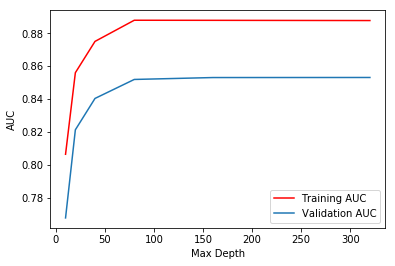

In [27]:
plt.plot(max_depths, train_mean_aucs, "r", label="Training AUC")
plt.plot(max_depths, val_mean_aucs, label="Validation AUC")
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.legend()
plt.show()


 ### Fitting and predicting multiple class labels
 #### Train and calculate AUC using decision tree classifiers for all class labels and varying max depths

In [34]:
max_depths = [10, 20, 40, 80, 160, 320]
train_mean_aucs, val_mean_aucs = [], []

for max_depth in max_depths:
    classifier = DecisionTreeClassifier(max_leaf_nodes=80, max_depth=max_depth)
    classifier = classifier.fit(train_features, train_y)
    valid_y_hat_prob = classifier.predict_proba(validation_features)
    train_y_hat_prob = classifier.predict_proba(train_features)

    valid_y_hat = np.transpose([
        y[:, 1]
        for y in valid_y_hat_prob
    ])
    train_y_hat = np.transpose([
        y[:, 1]
        for y in train_y_hat_prob
    ])
    
    val_aucs = []
    train_aucs = []
    for i in range(classes):
        fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat[:, i])
        val_aucs.append(auc(fpr, tpr))

        fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat[:, i])
        train_aucs.append(auc(fpr, tpr))

    val_mean_aucs.append(np.mean(val_aucs))
    train_mean_aucs.append(np.mean(train_aucs))

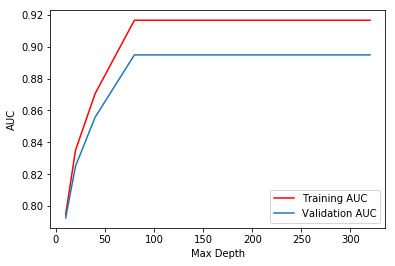

In [35]:
plt.plot(max_depths, train_mean_aucs, "r", label="Training AUC")
plt.plot(max_depths, val_mean_aucs, label="Validation AUC")
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.legend()
plt.show()

 ### Conclusion
 1. Training and predicting using multiple class labels results in a better AUC than training and predicting using individual class labels.
 2. Max depth=80 seems to be the highest AUC for validation data without overfitting it in both the cases. 

In [36]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_mean_aucs, val_mean_aucs = [], []

for min_samples_split in min_samples_splits:
    val_aucs = []
    train_aucs = []
    for i in range(classes):
        classifier = DecisionTreeClassifier(max_leaf_nodes=80, min_samples_split=min_samples_split)
        classifier = classifier.fit(train_features, train_y[:, i])
        
        valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
        val_aucs.append(auc(fpr, tpr))
        
        train_y_hat = classifier.predict_proba(train_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
        train_aucs.append(auc(fpr, tpr))

    val_mean_aucs.append(np.mean(val_aucs))
    train_mean_aucs.append(np.mean(train_aucs))



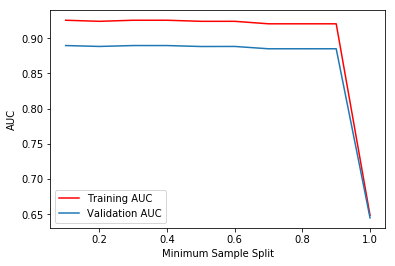

In [37]:
plt.plot(min_samples_splits, train_mean_aucs, "r", label="Training AUC")
plt.plot(min_samples_splits, val_mean_aucs, label="Validation AUC")
plt.xlabel("Minimum Sample Split")
plt.ylabel("AUC")
plt.legend()
plt.show()




At minimum sample split=0.3 we have the highest AUC for validation data. Anything more than 0.3 seems to overfit the data.

In [38]:
max_leaf_nodes = [10, 20, 40, 80, 160]
train_mean_aucs, val_mean_aucs = [], []

for max_leaf_node in max_leaf_nodes:
    val_aucs = []
    train_aucs = []
    for i in range(classes):
        classifier = DecisionTreeClassifier(max_leaf_nodes=max_leaf_node)
        classifier = classifier.fit(train_features, train_y[:, i])
        
        valid_y_hat = classifier.predict_proba(validation_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(valid_y[:, i], valid_y_hat)
        val_aucs.append(auc(fpr, tpr))
        
        train_y_hat = classifier.predict_proba(train_features)[:, 1]
        fpr, tpr, thresholds = roc_curve(train_y[:, i], train_y_hat)
        train_aucs.append(auc(fpr, tpr))

    val_mean_aucs.append(np.mean(val_aucs))
    train_mean_aucs.append(np.mean(train_aucs))

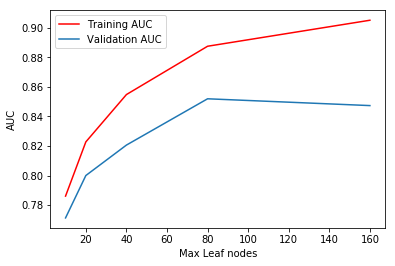

In [39]:
plt.plot(max_leaf_nodes, train_mean_aucs, "r", label="Training AUC")
plt.plot(max_leaf_nodes, val_mean_aucs, label="Validation AUC")
plt.xlabel("Max Leaf nodes")
plt.ylabel("AUC")
plt.legend()
plt.show()